Привет, меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>


<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за то, что прислала такую хорошую работу, мне она очень понравилась
- Я оставил некоторые советы, надеюсь они будут полезными или интересными.
* Радует, что код написан довольно чисто, читабельно и аккуратно. Приятно проверять такие работы.
* Есть маленькие недочеты, но я думаю у тебя не займет много времени исправить их и дополнить свою работу.
- Жду обновленный проект.

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[2]</font>
* Спасибо за оперативность.
- Недочеты исправлены, работа корректна.
- Удачи в дальнейшем обучении!

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

**Описание данных**  
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц.  
Известно:
- сalls — количество звонков,
- minutes — суммарная длительность звонков в минутах,
- messages — количество sms-сообщений,
- mb_used — израсходованный интернет-трафик в Мб,
- is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

<div class="alert alert-block alert-success">
<b>Успех:</b> Спасибо за описание проекта
</div>


<div class="alert alert-block alert-info">
<b>Совет:</b> Советую собирать все импорты  в верхней части ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
  
</div>

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

In [43]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [47]:
df.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [49]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


В датафрейме нет пропущенных значений, все колонки в требуемом типе данных (float), разве что можно изменить тип данных у столбца is_ultra, т.к. в нем только два значения 1 и 0.  
Стандартное отклоение максимально в столбце mb_used, это говорит о большом разбросе данных и необходимо проверить этот столбец на вбросы.

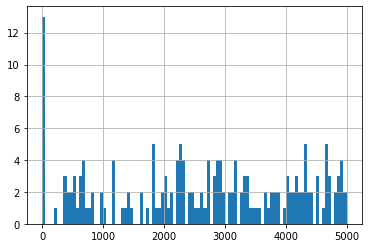

In [51]:
pd.Series(df['mb_used']).hist(bins=100, range=(0,5000))

Как видно из диаграммы есть пик на отметке 0, но не все пользователи выходят за количество мегабайт по своему тарифу, поэтому такое распределение вполне логично.

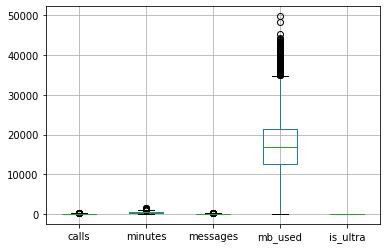

In [53]:
df.boxplot()

Как показала диаграмма размаха для столбца mb_used действительно есть много вбросов, многие из которых находятся в диапазоне от 35000 до 45000 мегабайт. Чтобы оценить адекватность, посчитаем сколько это в гигабайтах. 35000/1024 = 34 гб и 45000/1024 = 44 гб соответсвенно. В нанешних реалиях есть пользователи, кто тратят 100 и более гигабайт в месяц со своих мобильных устройств, поэтому эти данные имеют место быть, мы не будем их усреднять или выбрасывать из выборки, т.к. таких пользователей достаточно много.

<div class="alert alert-block alert-success">
<b>Успех:</b> Осмотр проведен
</div>

<div class="alert alert-info">
    
<b>Совет</b>
Также важно изучить корреляции в данных. Так мы можем оценить взаимосвязи в данных и влияние параметров на целевой признак. Рекомендую посмотреть метод `sns.pairplot` с параметром hue, в который мы передаем целевой признак. Будет здорово, если ты сможешь это реализовать в текущем или последующих проектах. 

</div>

## Разбейте данные на выборки

Т.к. у нас нет тестовой выборки, то мы разделим датафрейм на 3 выборки: обучающую, валидационную и тестовую в соотношении 3:1:1.

In [55]:
df_train, df_valid_test = train_test_split(df, test_size=0.4, random_state=12345)

In [57]:
df_valid, df_test = train_test_split(df_valid_test, test_size=0.5, random_state=12345)

In [59]:
print('Размер обучающей выборки:', df_train.shape)
print('Размер валидационной выборки:', df_valid.shape)
print('Размер тестовой выборки выборки:', df_test.shape)

Размер обучающей выборки: (1928, 5)
Размер валидационной выборки: (643, 5)
Размер тестовой выборки выборки: (643, 5)


Определим целевым признаком столбец is_ultra, а все остальные столбцы будут признаками.

<div class="alert alert-block alert-success">
<b>Успех:</b> С разбиением все в порядке
  
</div>
<div class="alert alert-block alert-info">
<b>Совет:</b> Лучше  проверять размеры выборок, это может предостеречь тебя от глупых ошибок
  
</div>

## Исследуйте модели

Переед нами стоит задача классификации. Поделить пользователей на тариф Ультра (1) или Смарт (0)

Рассмотрим три основные модели:  
- дерево решений,
- случайный лес,
- логистическая регрессия.

Рассмотрим первой модель дерево решений.  
Изменяя в цикле глубину дерева, определим наибольшее из возможных Accuracy.

In [61]:
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

In [63]:
for depth in range(1, 100, 5):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid)) 

max_depth = 1 : 0.7542768273716952
max_depth = 6 : 0.7838258164852255
max_depth = 11 : 0.7620528771384136
max_depth = 16 : 0.7340590979782271
max_depth = 21 : 0.7278382581648523
max_depth = 26 : 0.713841368584759
max_depth = 31 : 0.713841368584759
max_depth = 36 : 0.713841368584759
max_depth = 41 : 0.713841368584759
max_depth = 46 : 0.713841368584759
max_depth = 51 : 0.713841368584759
max_depth = 56 : 0.713841368584759
max_depth = 61 : 0.713841368584759
max_depth = 66 : 0.713841368584759
max_depth = 71 : 0.713841368584759
max_depth = 76 : 0.713841368584759
max_depth = 81 : 0.713841368584759
max_depth = 86 : 0.713841368584759
max_depth = 91 : 0.713841368584759
max_depth = 96 : 0.713841368584759


Как видно из расчетов: максиамльное Accuracy при глубине дерева = 6. И составляет 0.7838258164852255

Следующей рассмотрим модель случайный лес.  
Изменяя в цикле количество деревьев, определим максимально возможное Accuracy для данной модели.

In [65]:
best_model = None
best_result = 0
for est in range(1, 20):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    if result > best_result:
        best_model = model 
        best_result = result

print("Accuracy наилучшей модели на валидационной выборке:", best_result)
print(best_model)

Accuracy наилучшей модели на валидационной выборке: 0.7931570762052877
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=18,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)


Лучший показатель модели 0.7931570762052877 при количестве деревьев = 18.

Последней рассмотрим модель логистической регрессии.

In [67]:
model = LogisticRegression(random_state=12345) 
model.fit(features_train, target_train)
result = model.score(features_valid, target_valid) 

print("Accuracy модели логистической регрессии на валидационной выборке:", result)

Accuracy модели логистической регрессии на валидационной выборке: 0.7589424572317263


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Лучшим показателем для этой модели стал 0.7589424572317263.

Исходя из наших вычислений, лучшей моделью была признана модель случайный лес с колтчеством деревьев 18. 

Попробуем улучшить модель случайного леса, изменив гиперпараметры модели.

In [69]:
#best_model = None
#best_result = 0
#for est in range(1, 50):
 #   for depth in range(1, 100, 10):
  #      model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
   #     model.fit(features_train, target_train)
    #    result = model.score(features_valid, target_valid)
     #   if result > best_result:
      #      best_model = model 
       #     best_result = result

#print("Accuracy наилучшей модели на валидационной выборке:", best_result)
#print(best_model)

In [71]:
clf = RandomForestClassifier()

parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(features_train, target_train)

result_best_model = grid.score(features_valid, target_valid)

print(grid.best_params_)
print(result_best_model)

{'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 40}
0.7962674961119751


В ходе эксперимента была прияна наилучшей моделью RandomForestClassifier с гиперпараметрами n_estimators=30, max_depth=9, min_samples_split=2, min_samples_leaf=6.

<div class="alert alert-block alert-success">

<b>Успех:</b> Хорошо проделан шаг. Радует корректное использование валидационной выборки
</div>
<div class="alert alert-block alert-info">

<b>Совет:</b> Обрати также внимание на GridSearchCv и RandomizedSearchCV, эти инструменты могут быть удобными, когда большое количество параметров, уменьшает количество необходимых выборок, и делает код более лаконичным.
</div>

Спасибо за классный совет! Не знала о существовании подобных методов перебора, очень удобно, буду применять в дальнейшем.

## Проверьте модель на тестовой выборке

In [73]:
model = RandomForestClassifier(random_state=12345, n_estimators=30, max_depth=9, min_samples_split=2, min_samples_leaf=6)

model.fit(features_train, target_train)
result_test = model.score(features_test, target_test)

print('Результат accuracy на тестовой выборке:', result_test)
print('Результат accuracy на обучающей выборке:', result_best_model)

Результат accuracy на тестовой выборке: 0.8055987558320373
Результат accuracy на обучающей выборке: 0.7962674961119751


С помощью изменений гиперпараметров модели случайного леса мы добились максимальных показателей Accuracy равное 0.8055987558320373 на тестовой выборке и 0.7962674961119751 на обучающей.  
Гипарпараметры лучшей модели: random_state=12345, n_estimators=30, max_depth=9, min_samples_split=2, min_samples_leaf=6.


<div class="alert alert-block alert-danger">

<b>Ошибка:</b> Обучать модель нужно на тренировочной выборке (либо тренировочная+валидационная, это может добавить нам немного качества). А проверять на тестовой, ведь мы ее для этого и откладывали, чтобы провести итоговую оценку.

<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Есть
</div>


## (бонус) Проверьте модели на адекватность


<div class="alert alert-block alert-info">

<b>Совет:</b> Здесь подразумевалось, проверить предсказывают ли наши модели достаточно адекватно, или мы можем просто исопльзовать случайную/глупую фиктивную модель, которая будет предсказывать одно число (например наибольший класс), и точность будет не хуже. Для этого подошел бы инструмент DummyClassifier

In [91]:
X = features_train
y = target_train
dummy_clf = DummyClassifier(random_state=12345, strategy="most_frequent")
dummy_clf.fit(X, y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)
dummy_clf.score(X, y)


0.6924273858921162

In [98]:
df['is_ultra'].value_counts()/len(df['is_ultra'])

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

Данные в датасете не равномерны. Это показывает расчет количества пользователей на тарифе ультра (примерно 70% всех пользователей). Получается, что если мы будем всегда предсказывать 1 в колонке is_ultra, то точность прогноза будет 0.693528.  
Так же это подвтерждает метод DummyClassifier ( для нашей модели мы получили 0.6924273858921162 при "most_frequent", который всегда предсказывает наиболее частую метку в обучающем наборе.), а эффективность нашей модели на обучающей выборке 0.7962674961119751, что на 10% точнее, чем случайный набор данных. 

**для ревью. Не уверена, что правильно поняла этот метод, если не так, то поправьте меня пожалуйста.**

<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Правильно поняла, только обучать нужно на трейне, а предсказывать на тесте.
</div>


<div class="alert alert-block alert-danger">

<b>Ошибка:</b> Не забывай про итоговый вывод - это важная важная часть любого проекта и заказчик обратит сюда особое внимание, здесь важно описать, что было сделано, рассмотренно, использовано, какаие результаты были достигнуты и т.п. <br> Вывод также важно структурировать и выделять ключевые моменты

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75


## Общий вывод

В ходе проведенного эксперименты мы разделили первичный датасет на 3 выборки: обучающая, валидационная и тестовая.
В проекте были рассмотрены три модели: дерево, случайный лес и логистическая регрессия. Наилучшим образом себя проявила модель случайного леса.
С помощью изменений гиперпараметров модели случайного леса мы добились максимальных показателей Accuracy равное 0.8055987558320373 на тестовой выборке и 0.7962674961119751 на обучающей.
Гипарпараметры лучшей модели: random_state=12345, n_estimators=30, max_depth=9, min_samples_split=2, min_samples_leaf=6.  
Данные в датасете не равномерны. Это показывает расчет количества пользователей на тарифе ультра (примерно 70% всех пользователей). Получается, что если мы будем всегда предсказывать 1 в колонке is_ultra, то точность прогноза будет 0.693528.
Так же это подвтерждает метод DummyClassifier ( для нашей модели мы получили 0.6924273858921162 при "most_frequent", который всегда предсказывает наиболее частую метку в обучающем наборе.), а эффективность нашей модели на обучающей выборке 0.7962674961119751, что на 10% точнее, чем случайный набор данных.

<div class="alert alert-block alert-success">
<b>Успех[2]:</b> так намного лучше, осталось только начать структурировать выводы и выделять ключевые моменты)
</div>
